In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./heart.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


교수님께서 올려주신 columns별 설명을 봐도 사실 잘 모르겠어서 히트맵으로 확인해보겠음

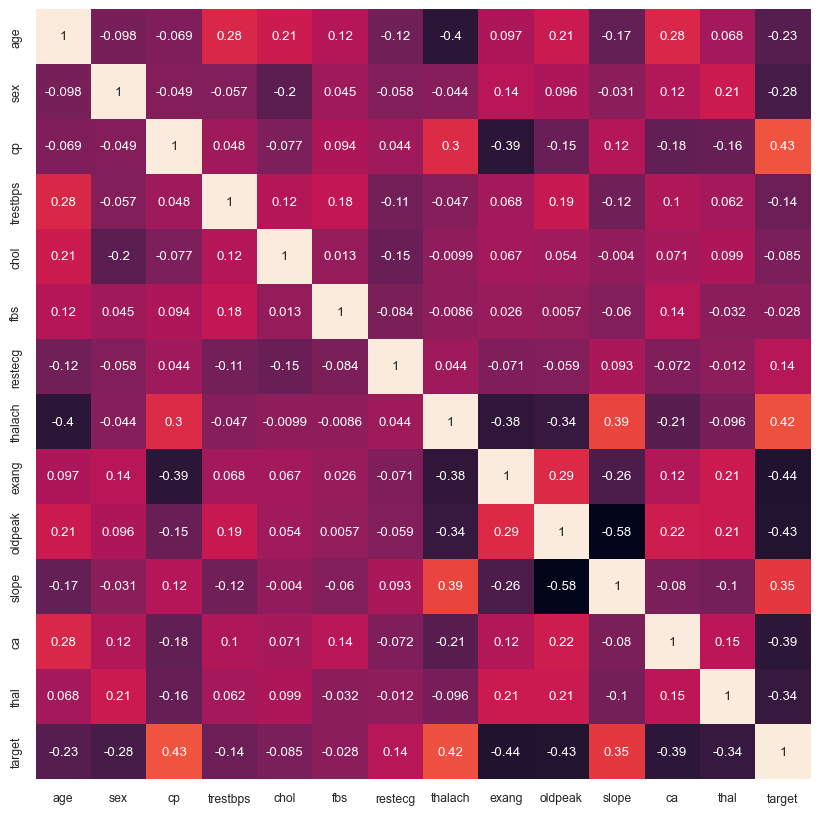

In [5]:
df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

데이터가 너무 적어서 일단 다 진행해보고 cp, restecg, thalach, slope만 X에 넣고 다시 해볼 예정

In [6]:
X = df.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((242, 13), (242,), (61, 13), (61,))

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10,input_shape=(13,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#다중 분류일 때 softmax

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#다중 분류 categorical_crossentropy

model.summary()

c:\Users\syjwk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
N_EPOCHS = 30
history = model.fit(
    X_train, y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int).reshape(-1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5295 - loss: 5.5269 - val_accuracy: 0.5574 - val_loss: 3.9672
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5494 - loss: 3.7162 - val_accuracy: 0.5574 - val_loss: 2.4631
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5259 - loss: 2.3493 - val_accuracy: 0.5574 - val_loss: 1.2556
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5829 - loss: 1.0071 - val_accuracy: 0.5574 - val_loss: 0.7265
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7640 - val_accuracy: 0.5410 - val_loss: 0.7393
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5797 - loss: 0.6837 - val_accuracy: 0.6721 - val_loss: 0.6021
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5859 - loss: 0.6519 - val_accuracy: 0.7049 - val_loss: 0.5781
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6622 - loss: 0.6138 - val_accuracy: 0.7213 - val_loss: 0.5897
Epoch

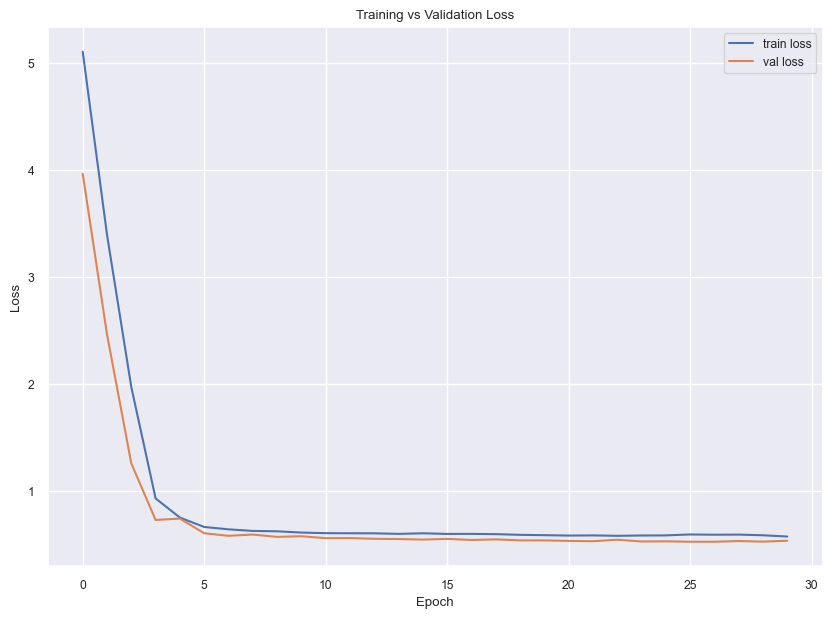

In [14]:
plt.figure(figsize=(10,7))
epochs = len(history.history['loss'])  # 또는 model_history
plt.plot(range(epochs), history.history['loss'], label='train loss')
plt.plot(range(epochs), history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7517 - loss: 0.5095


[0.5315635800361633, 0.7213114500045776]

성능이 살짝 아쉬워서 노드를 늘려서 다시 진행

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))  
model.add(Dense(32, activation='relu'))                      
model.add(Dense(32, activation='relu'))     
model.add(Dense(32, activation='relu'))                     
model.add(Dense(16, activation='relu'))  
model.add(Dense(8, activation='relu'))                                          
model.add(Dense(1, activation='sigmoid'))                    

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\syjwk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,761 (22.50 KB)

 Trainable params: 5,761 (22.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
N_EPOCHS = 30
history = model.fit(
    X_train, y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int).reshape(-1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5548 - loss: 6.2794 - val_accuracy: 0.5574 - val_loss: 1.4505
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5415 - loss: 1.1369 - val_accuracy: 0.5902 - val_loss: 0.6716
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5820 - loss: 0.6704 - val_accuracy: 0.7049 - val_loss: 0.6174
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6657 - loss: 0.6101 - val_accuracy: 0.7213 - val_loss: 0.6066
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7032 - loss: 0.6103 - val_accuracy: 0.7213 - val_loss: 0.5995
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6172 - loss: 0.6251 - val_accuracy: 0.7213 - val_loss: 0.5913
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7275 - loss: 0.5793 - val_accuracy: 0.6557 - val_loss: 0.6089
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6710 - loss: 0.6165 - val_accuracy: 0.7213 - val_loss: 0.5893
Epoch 9

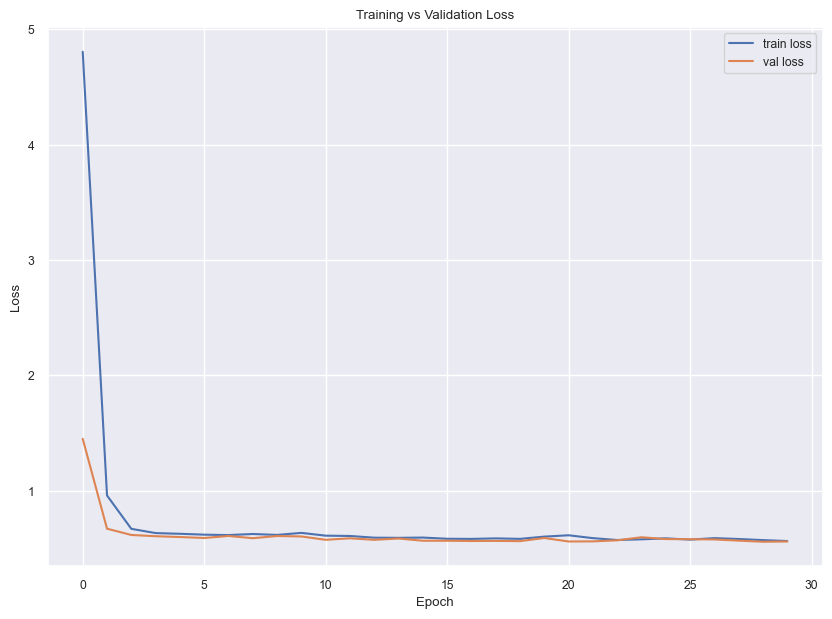

In [19]:
plt.figure(figsize=(10,7))
epochs = len(history.history['loss'])  # 또는 model_history
plt.plot(range(epochs), history.history['loss'], label='train loss')
plt.plot(range(epochs), history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7304 - loss: 0.5503 


[0.5608311891555786, 0.7049180269241333]

In [21]:
columns_x = ['cp', 'restecg', 'thalach', 'slope']

In [22]:
X = df[columns_x]

X.head()

,cp,restecg,thalach,slope
0,3,0,150,0
1,2,1,187,0
2,1,0,172,2
3,1,1,178,2
4,0,1,163,2


In [23]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((242, 4), (242,), (61, 4), (61,))

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, input_shape=(4,), activation='relu'))  
model.add(Dense(32, activation='relu'))                      
model.add(Dense(32, activation='relu'))     
model.add(Dense(32, activation='relu'))                     
model.add(Dense(16, activation='relu'))  
model.add(Dense(8, activation='relu'))                                          
model.add(Dense(1, activation='sigmoid'))                    

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\syjwk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,185 (20.25 KB)

 Trainable params: 5,185 (20.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
N_EPOCHS = 30
history = model.fit(
    X_train, y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int).reshape(-1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5198 - loss: 0.7435 - val_accuracy: 0.5574 - val_loss: 0.7226
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4800 - loss: 0.7563 - val_accuracy: 0.5574 - val_loss: 0.6903
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5097 - loss: 0.6987 - val_accuracy: 0.5574 - val_loss: 0.6864
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5048 - loss: 0.7189 - val_accuracy: 0.5574 - val_loss: 0.6832
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5332 - loss: 0.6999 - val_accuracy: 0.5574 - val_loss: 0.6835
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5759 - loss: 0.6832 - val_accuracy: 0.5574 - val_loss: 0.6911
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5550 - loss: 0.6894 - val_accuracy: 0.5574 - val_loss: 0.6798
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5923 - loss: 0.6728 - val_accuracy: 0.5574 - val_loss: 0.6882
Epoch 9

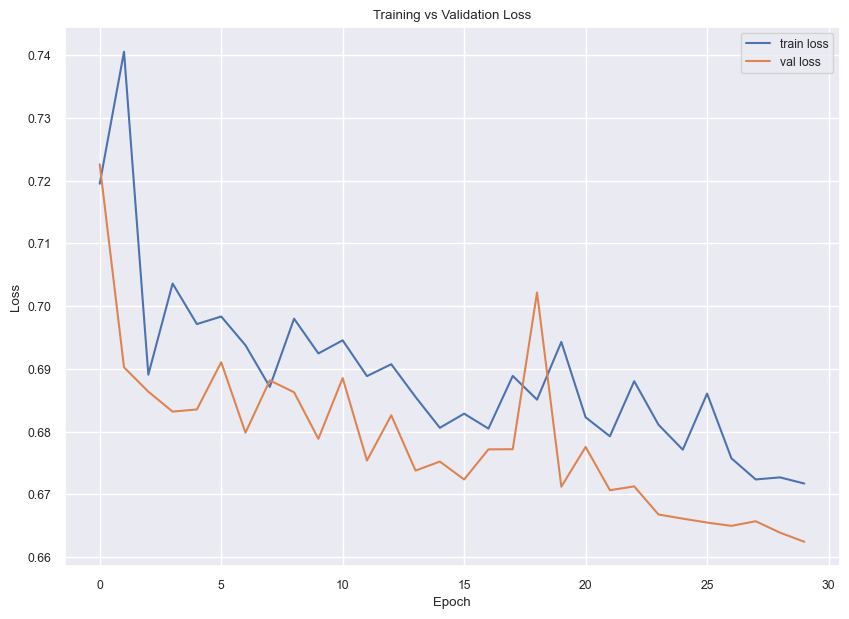

In [27]:
plt.figure(figsize=(10,7))
epochs = len(history.history['loss'])  # 또는 model_history
plt.plot(range(epochs), history.history['loss'], label='train loss')
plt.plot(range(epochs), history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


underfitting이 발생한 것 같다.

In [28]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5174 - loss: 0.6730


[0.6624331474304199, 0.5573770403862]